In [1]:
!pip install pandas numpy matplotlib seaborn

In [3]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [4]:
import pandas as pd

# Now load the dataset
data = pd.read_csv('housing.csv')

Saving housing.csv to housing (3).csv
RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64
Linear Regression RMSE: 93584.19764649936
Linear Regression R²: 0.1292071645653332
Random Forest RMSE: 73305.49770145775
Random Forest R²: 0.4657028001959177


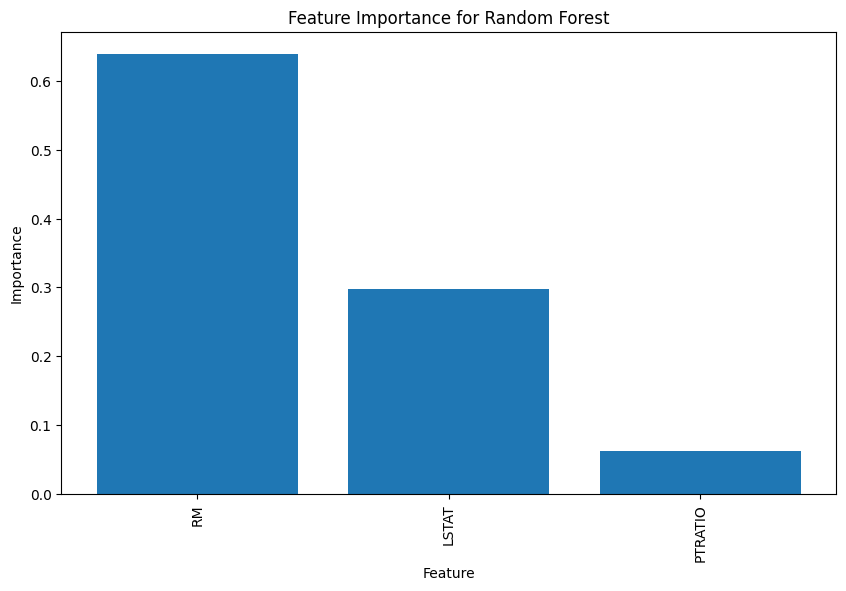

In [8]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the dataset
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('housing.csv')

# Check for missing values
print(data.isnull().sum())

# Optional: Handle missing values
data.dropna(inplace=True)  # Remove rows with NaN values

# 1. Data Preprocessing
def normalize(df):
    return (df - df.mean()) / df.std()

numerical_features = data.columns.difference(['MEDV'])  # Exclude target variable
data[numerical_features] = normalize(data[numerical_features])

# 2. Model Implementation

class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        self.coef_ = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

class RandomForestRegressor:
    def __init__(self, n_estimators=100):
        self.n_estimators = n_estimators
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor()
            # Use Bootstrap sampling
            indices = np.random.choice(range(X.shape[0]), size=X.shape[0], replace=True)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        return np.mean([tree.predict(X) for tree in self.trees], axis=0)

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Split data into features and target
X = data[numerical_features].values
y = data['MEDV'].values

# 3. Performance Comparison
X_train, X_test = X[:400], X[400:]
y_train, y_test = y[:400], y[400:]

# Implementing models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)

# Random Forest
rf_reg = RandomForestRegressor(n_estimators=10)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

# Calculate and compare performance
print("Linear Regression RMSE:", rmse(y_test, lin_pred))
print("Linear Regression R²:", r2_score(y_test, lin_pred))
print("Random Forest RMSE:", rmse(y_test, rf_pred))
print("Random Forest R²:", r2_score(y_test, rf_pred))

# 4. Feature Importance Visualization
def plot_feature_importance(model, feature_names):
    importances = np.mean([tree.feature_importances_ for tree in model.trees], axis=0)
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importance for Random Forest')
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

plot_feature_importance(rf_reg, numerical_features)